## Read data

In [1]:
import numpy as np
import matplotlib.pyplot as mlt
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
bos_data=load_boston()

In [6]:
bos_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
bos_df=pd.DataFrame(bos_data.data,columns=bos_data.feature_names)

In [8]:
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Split data

In [10]:
x=bos_df[['RM','LSTAT']]
bos_df['MEDV']=bos_data.target
y=bos_df['MEDV']

In [11]:
print(x)

        RM  LSTAT
0    6.575   4.98
1    6.421   9.14
2    7.185   4.03
3    6.998   2.94
4    7.147   5.33
..     ...    ...
501  6.593   9.67
502  6.120   9.08
503  6.976   5.64
504  6.794   6.48
505  6.030   7.88

[506 rows x 2 columns]


In [13]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Polynomial transform

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [71]:
poly=PolynomialFeatures(degree=3)

In [72]:
x_poly=poly.fit_transform(x_train)
x_poly

array([[1.00000000e+00, 6.95100000e+00, 9.71000000e+00, ...,
        4.69152254e+02, 6.55368779e+02, 9.15498611e+02],
       [1.00000000e+00, 5.96100000e+00, 9.88000000e+00, ...,
        3.51071187e+02, 5.81879438e+02, 9.64430272e+02],
       [1.00000000e+00, 6.89700000e+00, 1.13800000e+01, ...,
        5.41330770e+02, 8.93191847e+02, 1.47376007e+03],
       ...,
       [1.00000000e+00, 6.02100000e+00, 1.03000000e+01, ...,
        3.73400142e+02, 6.38767890e+02, 1.09272700e+03],
       [1.00000000e+00, 6.03000000e+00, 1.88000000e+01, ...,
        6.83584920e+02, 2.13124320e+03, 6.64467200e+03],
       [1.00000000e+00, 5.57200000e+00, 1.46900000e+01, ...,
        4.56083133e+02, 1.20241587e+03, 3.17004471e+03]])

## Fitting

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr=LinearRegression()

In [75]:
lr.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lr.coef_

array([ 0.00000000e+00, -1.35603077e+02, -1.38317703e+01,  1.86979322e+01,
        4.19021313e+00,  1.30229313e-01, -7.69743126e-01, -3.45231795e-01,
       -1.66973729e-02, -5.14672730e-04])

In [77]:
lr.intercept_

336.67426960658594

## Predict y

In [24]:
y_train_pred=lr.predict(x_poly)

In [25]:
y_test_pred=lr.predict(poly.fit_transform(x_test))

## Metric evaluation

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mse_train=mean_squared_error(y_train,y_train_pred)

In [28]:
rmse_train=np.sqrt(mse_train)
rmse_train

4.132523928832216

In [29]:
mse_test=mean_squared_error(y_test,y_test_pred)

In [30]:
rmse_test=np.sqrt(mse_test)
rmse_test

5.3448261370466135

## Plotting

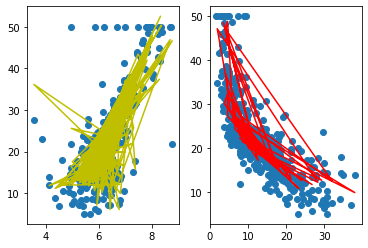

In [64]:
x1=bos_df['RM']
y=bos_df['MEDV']
mlt.subplot(121)
mlt.scatter(x1,y)
mlt.plot(x_train['RM'],y_train_pred,color='y')

x2=bos_df['LSTAT']
y=bos_df['MEDV']
mlt.subplot(122)
mlt.scatter(x2,y)
mlt.plot(x_test['LSTAT'],y_test_pred,color='r')

## Overfitting

In [40]:
from sklearn.datasets import load_boston
bos_data=load_boston()
bos_df=pd.DataFrame(bos_data.data,columns=bos_data.feature_names)


x=bos_df[['RM','LSTAT']]
bos_df['MEDV']=bos_data.target
y=bos_df['MEDV']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=10)
x_poly=poly.fit_transform(x_train)


from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_poly,y_train)
print('lr.coef_  ',lr.coef_)
print('lr.intercept_  ',lr.intercept_)


y_train_pred=lr.predict(x_poly)
y_test_pred=lr.predict(poly.fit_transform(x_test))


from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=np.sqrt(mse_train)
print('rmse_train  ',rmse_train)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=np.sqrt(mse_test)
print('rmse_test  ',rmse_test)

lr.coef_   [ 7.53512925e-01 -7.44972187e-02 -1.27764435e-01  2.20724111e-01
 -2.01207627e-01 -6.62188860e-01  7.18432823e-01 -1.55419404e-01
 -1.00750380e+00 -1.65945340e+00  1.52021223e+00  2.05487119e-01
 -9.65986774e-01 -1.36506755e+00 -8.48117558e-01  1.33984319e+00
  5.92642693e-01 -1.60864240e-01  4.61891237e-02  2.18258426e+00
 -1.22941864e-01 -1.83380516e+00 -3.09309136e-01  3.45718583e-01
  4.79617395e-01 -1.14883143e+00  2.32858683e-02  6.04595995e-03
  6.03653343e-01  1.76000226e-01 -2.31459696e-01 -1.15902324e-01
  2.55396464e-01  6.20785511e-03 -1.55943566e-03 -1.65135682e-04
 -8.74245044e-02 -4.65093085e-02  5.54334933e-02  9.18131405e-03
 -2.93105823e-02 -2.29014970e-03  2.41874572e-04  8.25007762e-06
  4.18075750e-06  5.93971959e-03  5.04760723e-03 -5.34709050e-03
 -3.00976228e-04  1.76829959e-03  2.59022572e-04 -2.67407264e-05
  1.45499848e-06 -2.51137077e-07 -5.29823627e-08 -1.55228584e-04
 -1.89034664e-04  1.72456225e-04  1.78851060e-05 -5.32290853e-05
 -6.27337511e-

## Underfitting

In [41]:
from sklearn.datasets import load_boston
bos_data=load_boston()
bos_df=pd.DataFrame(bos_data.data,columns=bos_data.feature_names)


x=bos_df[['RM','LSTAT']]
bos_df['MEDV']=bos_data.target
y=bos_df['MEDV']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
x_poly=poly.fit_transform(x_train)


from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_poly,y_train)
print('lr.coef_  ',lr.coef_)
print('lr.intercept_  ',lr.intercept_)


y_train_pred=lr.predict(x_poly)
y_test_pred=lr.predict(poly.fit_transform(x_test))


from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=np.sqrt(mse_train)
print('rmse_train  ',rmse_train)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=np.sqrt(mse_test)
print('rmse_test  ',rmse_test)

lr.coef_   [ 0.          5.10906846 -0.65494879]
lr.intercept_   -1.2625286844374628
rmse_train   5.3656571342244215
rmse_test   6.11417252281778


## Using normalize

In [45]:
from sklearn.datasets import load_boston
bos_data=load_boston()
bos_df=pd.DataFrame(bos_data.data,columns=bos_data.feature_names)


x=bos_df[['RM','LSTAT']]
bos_df['MEDV']=bos_data.target
y=bos_df['MEDV']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x_train)


from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_poly,y_train)
print('lr.coef_  ',lr.coef_)
print('lr.intercept_  ',lr.intercept_)


y_train_pred=lr.predict(x_poly)
y_test_pred=lr.predict(poly.fit_transform(x_test))


from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=np.sqrt(mse_train)
print('rmse_train  ',rmse_train)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=np.sqrt(mse_test)
print('rmse_test  ',rmse_test)

lr.coef_   [ 0.00000000e+00 -1.35603077e+02 -1.38317703e+01  1.86979322e+01
  4.19021313e+00  1.30229313e-01 -7.69743126e-01 -3.45231795e-01
 -1.66973729e-02 -5.14672730e-04]
lr.intercept_   336.6742696062994
rmse_train   4.132523928832215
rmse_test   5.34482613705127


In [42]:
from sklearn.datasets import load_boston
bos_data=load_boston()
bos_df=pd.DataFrame(bos_data.data,columns=bos_data.feature_names)


x=bos_df[['RM','LSTAT']]
bos_df['MEDV']=bos_data.target
y=bos_df['MEDV']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=0)
x_poly=poly.fit_transform(x_train)


from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_poly,y_train)
print('lr.coef_  ',lr.coef_)
print('lr.intercept_  ',lr.intercept_)


y_train_pred=lr.predict(x_poly)
y_test_pred=lr.predict(poly.fit_transform(x_test))


from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=np.sqrt(mse_train)
print('rmse_train  ',rmse_train)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=np.sqrt(mse_test)
print('rmse_test  ',rmse_test)

ValueError: could not broadcast input array from shape (404,2) into shape (404,0)